# Proyecto Series de Tiempo Univariadas
El siguiente Script abarca las metodologías vistas en el semestre 2024-1 de Series de Tiempo Univariadas desarrolladas en Python, utilizando la medición de la tasa de desempleo en Colombia; desde enero de 2001 hasta diciembre de 2023.

#### Integrantes: Anderson Guarín, Ander Cristancho, Juan Duitama

## Librerías utilizadas

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pylab as plt
import statsmodels.api as sm
import datetime as dt
import scipy as sp
import scipy.stats 

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import keras_tuner as kt
from tensorflow.keras import layers
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV

## Importación base de datos

In [3]:
import os
os.chdir(r"C:\Users\EQUIPO\OneDrive\Documentos\Documentos Ander\UNAL\Series de tiempo\Mis series y descriptiva")
os.getcwd()

'C:\\Users\\EQUIPO\\OneDrive\\Documentos\\Documentos Ander\\UNAL\\Series de tiempo\\Mis series y descriptiva'

In [4]:
Data = pd.read_excel("Desempleo.xlsx",skiprows=5,nrows=277)
Data = Data.iloc[:,[0,2]]
print(Data.dtypes)
# Cambiar los nombres de las columnas
nuevos_nombres = ['AnioMes', 'TasaDesempleo']
Data.columns = nuevos_nombres
Data

Año-Mes (AAAA-MM)         object
Tasa de desempleo (%)    float64
dtype: object


,AnioMes,TasaDesempleo
0,2023-12,10.013717
1,2023-11,9.007386
2,2023-10,9.230912
3,2023-09,9.252674
4,2023-08,9.277372
...,...,...
271,2001-05,14.035800
272,2001-04,14.515100
273,2001-03,15.811900
274,2001-02,17.434200


## Gráfica de la tasa de desempleo en Colombia

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Tasa de desempleo mensual en Colombia')

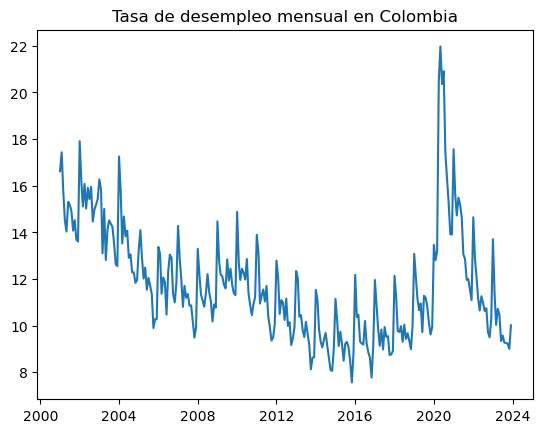

In [5]:
#Primera observación de los datos
Data['AnioMes']=pd.to_datetime(Data['AnioMes'])#Convirtiendo la columna año y mes a formato fecha
Desempleo1=Data.set_index('AnioMes')#Ordenando el dataframe, pero creo uno nuevo para volverlo objeto de series de tiempo luego
print(type(Desempleo1))
#Convirtiendo el data frame en objeto serie de tiempo
DesempleoTS=Desempleo1['TasaDesempleo']
print(type(DesempleoTS))
plt.plot(DesempleoTS)#Haciendo un primer gráfico de la serie de tiempo
plt.title('Tasa de desempleo mensual en Colombia') 

# Modelamiento utilizando Redes Neuronales
## Redes Neuronales Multicapa(MLP)


In [6]:
NuevaConf = pd.DataFrame(Data['TasaDesempleo'].iloc[::-1].values,index=pd.date_range(start='2001-01-01', end='2023-12-01', freq='MS') )
from pandas import DataFrame
df2 = DataFrame()#Creando un DataFrame vacío para luego llenar
for i in range(12,8,-1):
    df2[['t-'+str(i)]] = NuevaConf.shift(i)#El método shift() se encarga de desplazar las filas i veces hacia abajo
    
for i in range(6,1,-1):   
    df2[['t-'+str(i)]] = NuevaConf.shift(i)
    
#df2.reset_index(inplace=True)
#df2.rename(columns={'index': 'Fecha'}, inplace=True)
#df2['Fecha']=pd.to_datetime(df2['Fecha'])  

#meses = {
#    2: 'Febrero',
#    3: 'Marzo',
#    4: 'Abril',
#    5: 'Mayo',
#    6: 'Junio',
#    7: 'Julio',
#    8: 'Agosto',
#    9: 'Septiembre',
#    10: 'Octubre',
#    11: 'Noviembre',
#    12: 'Diciembre'
#}

#df2['Mes'] = df2['Fecha'].dt.month
#dummies = pd.get_dummies(df2['Mes'], prefix='Mes', drop_first=True)  # drop_first=True para evitar la multicolinealidad
#df2 = df2.join(dummies)   
    
#column_mapping = {f'Mes_{num}': name for num, name in meses.items()}
#df2.rename(columns=column_mapping, inplace=True)
    
#df2.set_index('Fecha', inplace=True)
    
df2['t'] = NuevaConf.values
df2 = df2[12:]
print(df2.head(10))

               t-12     t-11     t-10      t-9      t-6      t-5      t-4  \
2002-01-01  16.6223  17.4342  15.8119  14.5151  15.1838  14.9135  14.0741   
2002-02-01  17.4342  15.8119  14.5151  14.0358  14.9135  14.0741  14.5249   
2002-03-01  15.8119  14.5151  14.0358  15.3123  14.0741  14.5249  13.6822   
2002-04-01  14.5151  14.0358  15.3123  15.1838  14.5249  13.6822  13.6084   
2002-05-01  14.0358  15.3123  15.1838  14.9135  13.6822  13.6084  17.9099   
2002-06-01  15.3123  15.1838  14.9135  14.0741  13.6084  17.9099  16.1888   
2002-07-01  15.1838  14.9135  14.0741  14.5249  17.9099  16.1888  15.1114   
2002-08-01  14.9135  14.0741  14.5249  13.6822  16.1888  15.1114  16.0770   
2002-09-01  14.0741  14.5249  13.6822  13.6084  15.1114  16.0770  15.0221   
2002-10-01  14.5249  13.6822  13.6084  17.9099  16.0770  15.0221  15.9110   

                t-3      t-2        t  
2002-01-01  14.5249  13.6822  17.9099  
2002-02-01  13.6822  13.6084  16.1888  
2002-03-01  13.6084  17.9099  15

División entrenamiento y prueba

In [7]:
Split2 = df2.values #Convirtiendo en NumpyArray
X1_2= Split2[:, 0:-1] #Selecciono todas las filas, y todas las columnas excepto la última que es la variable respuesta
y1_2 =Split2[:,-1] #Selecciono todas las filas y solo la última columna 

In [8]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X1_2,y1_2,test_size=0.2, train_size=0.8,shuffle=False)

División del entrenamiento en entrenamiento y validación (los porcentajes los seleccioné así para que quede similar a los porcentajes 70,10,20 del modelo de árboles)

In [9]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.12, train_size=0.88,shuffle=False)

### Estandarización de las covariables

In [10]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

Las respuestas no se estandarizan

### Red Neuronal con una sola capa
Recordemos que los hiperparámetros de una red neuronal multicapa son la cantidad de capas, los nodos que tiene cada capa y la función de activación.
Para crear las capas se utiliza [], y se separan con comas. En este caso, hay una sola capa oculta, y una de salida (*keras.layers.Dense(1)*)
* *layers.Dense* - layers indica que voy a añadir una nueva capa, .Dense, que esa capa será Densa
* 64 son la cantidad de nodos que hay dentro de esa primera capa oculta.
* activation="relu","linear","tanh" indica que la función de activación es relu, tanh o lineal respectivamente
* *input_shape=X_train.shape[1:]* son la cantidad de columnas que tiene nuestro dataframe, en este caso 9(escogimos 9 retardos)
* La capa de salida *keras.layers.Dense(1)* tiene un 1 debido a que nuestra variable respuesta es univariada

In [11]:
ModMLP1=keras.models.Sequential([keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
ModMLP1.summary()

C:\Users\EQUIPO\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
ModMLP1_1=keras.models.Sequential([keras.layers.Dense(64,activation="linear",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
ModMLP1_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
ModMLP1_2=keras.models.Sequential([keras.layers.Dense(64,activation="tanh",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
ModMLP1_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

Utilizaremos el error cuadrático medio como métrica y el optimizador adam.
Además, realizaremos 50 épocas, junto a un tamaño de lote=12(por defecto es 32, entonces tendré 185/12 lotes, 185 porque hay 185 datos de entrenamiento

In [14]:
ModMLP1.compile(loss="mean_squared_error",optimizer="adam")
historyMod1=ModMLP1.fit(X_train,y_train,batch_size=12,epochs=50,validation_data=(X_val,y_val)) 

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 133.2003 - val_loss: 96.4223
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.9951 - val_loss: 89.6121
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.5797 - val_loss: 81.8840
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97.7332 - val_loss: 73.1978
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.4911 - val_loss: 63.2565
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.0686 - val_loss: 52.4650
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.2508 - val_loss: 42.0518
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.3273 - val_loss: 32.7327
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.8549 - val_loss: 25.1570
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9538 - val_loss: 19.4098
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3016 - val_loss: 15.3304
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

#### Comportamiento de la pérdida cuadrática en este conjunto de entrenamiento y validación

(185, 9)

<Axes: >

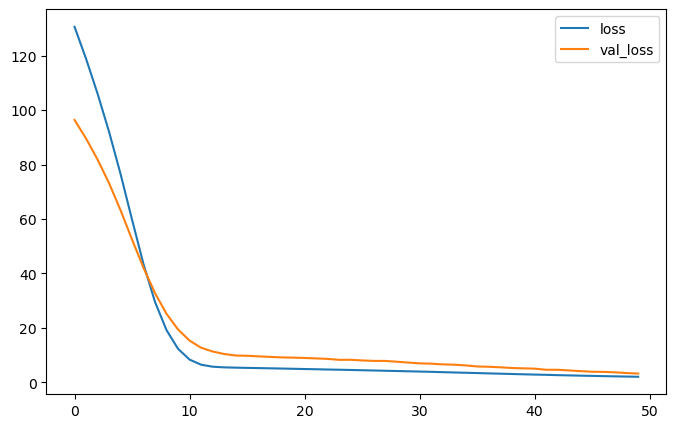

In [15]:
X_train.shape
pd.DataFrame(historyMod1.history).plot(figsize=(8,5))

In [16]:
mse_test1=ModMLP1.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.3264 


In [17]:
ypred1=ModMLP1.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


#### Gráfico de predicción y valores reales

<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Real vs Predicción')

Text(0, 0.5, 'Tasa de Desempleo')

Text(0.5, 0, 'índice')

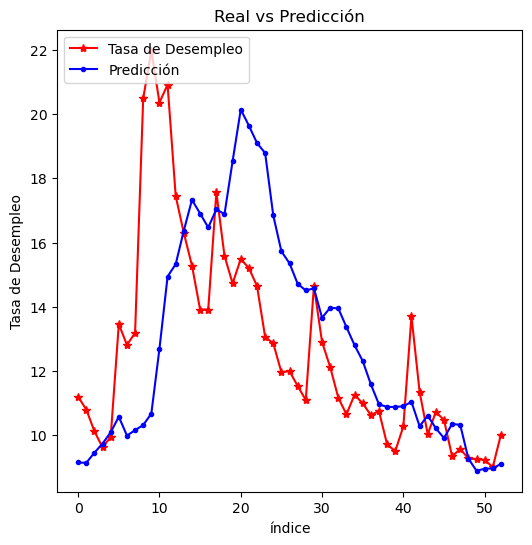

In [18]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred1.size), ypred1, linestyle='-', marker='.', color='b') 
plt.legend(['Tasa de Desempleo','Predicción'], loc=2)
plt.title('Real vs Predicción')
plt.ylabel('Tasa de Desempleo')
plt.xlabel('índice')

No es un buen modelo prediciendo, no obstante, es entendible, puesto que el modelo intenta predecir la tasa de desempleo correspondiente al periodo de 2020 en adelante, el cual ya sabemos fue una época atípica para la humanidad. 

In [19]:
ModMLP1_1.compile(loss="mean_squared_error",optimizer="adam")
historyMod1_1=ModMLP1_1.fit(X_train,y_train,batch_size=12,epochs=50,validation_data=(X_val,y_val)) 

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 131.1893 - val_loss: 90.5695
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.8152 - val_loss: 79.9560
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90.0481 - val_loss: 69.0639
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.1198 - val_loss: 57.6956
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.0526 - val_loss: 46.2941
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.6456 - val_loss: 35.8559
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.3069 - val_loss: 26.8987
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4101 - val_loss: 20.1749
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5305 - val_loss: 15.6567
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5945 - val_loss: 12.7575
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2526 - val_loss: 11.2988
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

#### Comportamiento de la pérdida cuadrática en este conjunto de entrenamiento y validación

(185, 9)

<Axes: >

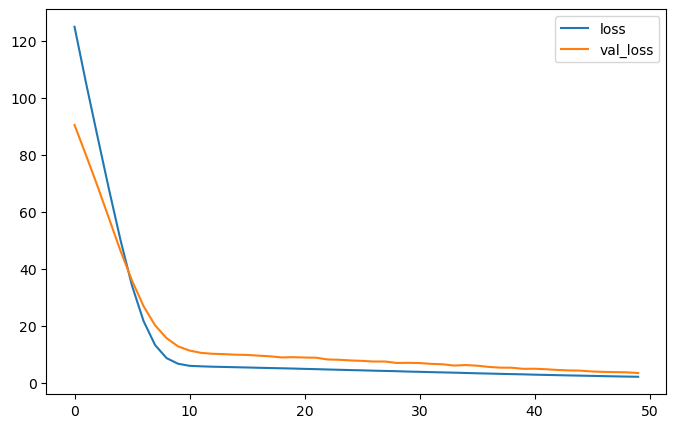

In [20]:
X_train.shape
pd.DataFrame(historyMod1_1.history).plot(figsize=(8,5))

In [21]:
mse_test1_1=ModMLP1_1.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.9229 


In [22]:
ypred1_1=ModMLP1_1.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


#### Gráfico de predicción y valores reales

<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Real vs Predicción')

Text(0, 0.5, 'Tasa de Desempleo')

Text(0.5, 0, 'índice')

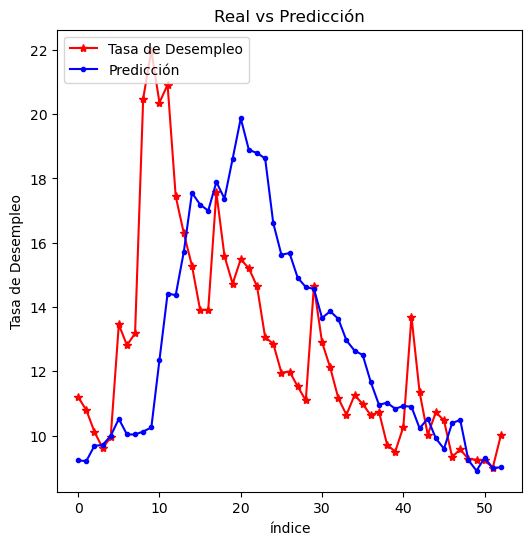

In [23]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred1_1.size), ypred1_1, linestyle='-', marker='.', color='b') 
plt.legend(['Tasa de Desempleo','Predicción'], loc=2)
plt.title('Real vs Predicción')
plt.ylabel('Tasa de Desempleo')
plt.xlabel('índice')

Tampoco es buen modelo prediciendo, sin embargo, en cuanto a error cuadrático medio, este modelo presenta una disminución respecto al anterior.

In [24]:
ModMLP1_2.compile(loss="mean_squared_error",optimizer="adam")
historyMod1_2=ModMLP1_2.fit(X_train,y_train,batch_size=12,epochs=50,validation_data=(X_val,y_val)) 

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 133.7720 - val_loss: 92.4470
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.6890 - val_loss: 79.9867
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.5168 - val_loss: 67.7889
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.5020 - val_loss: 55.9784
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.8820 - val_loss: 44.8701
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39.3694 - val_loss: 34.8795
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.5677 - val_loss: 26.4637
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.8613 - val_loss: 19.8229
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9503 - val_loss: 14.7758
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7937 - val_loss: 11.1151
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2528 - val_loss: 8.6437
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

#### Comportamiento de la pérdida cuadrática en este conjunto de entrenamiento y validación

(185, 9)

<Axes: >

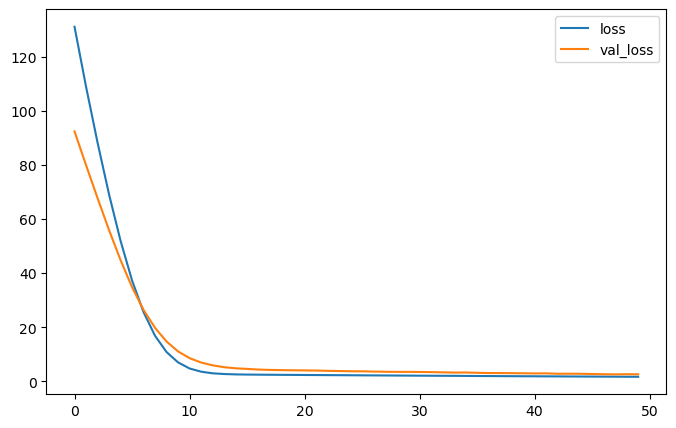

In [25]:
X_train.shape
pd.DataFrame(historyMod1_2.history).plot(figsize=(8,5))

In [26]:
mse_test1_2=ModMLP1_2.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1983 


In [27]:
ypred1_2=ModMLP1_2.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002596F5A6B00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


#### Gráfico de predicción y valores reales

<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Real vs Predicción')

Text(0, 0.5, 'Tasa de Desempleo')

Text(0.5, 0, 'índice')

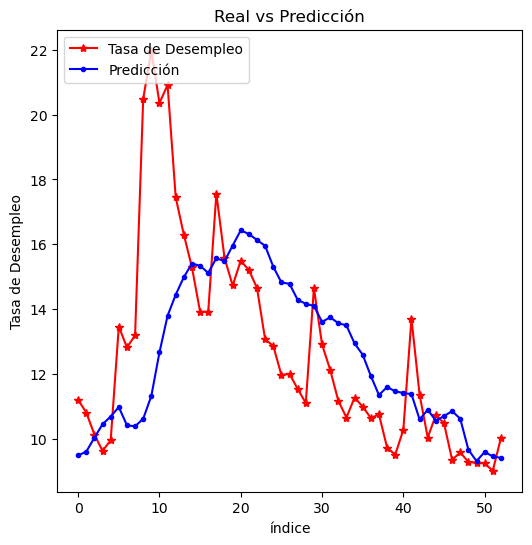

In [28]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred1_2.size), ypred1_2, linestyle='-', marker='.', color='b') 
plt.legend(['Tasa de Desempleo','Predicción'], loc=2)
plt.title('Real vs Predicción')
plt.ylabel('Tasa de Desempleo')
plt.xlabel('índice')

De entre los tres modelos, este es el mejor en términos del error cuadrático medio, pero cabe recordar que siguen siendo modelos no muy buenos.

### Red de una sóla capa incluyendo dummys

from pandas import DataFrame
df2 = DataFrame()#Creando un DataFrame vacío para luego llenar
for i in range(12,8,-1):
    df2[['t-'+str(i)]] = NuevaConf.shift(i)#El método shift() se encarga de desplazar las filas i veces hacia abajo
    
for i in range(6,1,-1):   
    df2[['t-'+str(i)]] = NuevaConf.shift(i)
    
df2.reset_index(inplace=True)
df2.rename(columns={'index': 'Fecha'}, inplace=True)
df2['Fecha']=pd.to_datetime(df2['Fecha'])  

meses = {
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

df2['Mes'] = df2['Fecha'].dt.month
dummies = pd.get_dummies(df2['Mes'], prefix='Mes', drop_first=True)  # drop_first=True para evitar la multicolinealidad
df2 = df2.join(dummies)   
    
column_mapping = {f'Mes_{num}': name for num, name in meses.items()}
df2.rename(columns=column_mapping, inplace=True)
    
df2.set_index('Fecha', inplace=True)
    
df2['t'] = NuevaConf.values
df2 = df2[12:]
print(df2.head(10))

### Red neuronal con más capas
La anterior red neuronal contó con una sola capa oculta, la siguiente red contará con tres capas ocultas, de 64, 32, y 16 nodos respectivamente.
Se harán distintas pruebas en cuanto a la función de activación y nos quedaremos con la mejor combinación, pero así como en el caso anterior, se utilizará un tamaño de lote igual a 12 y 50 épocas.

In [29]:
#funciones = ["relu","linear","tanh"]
#temp = 1000

#for i in funciones:
#    for j in funciones:
#        for k in funciones:
#            for l in funciones:
#                input_layer = keras.layers.Input(shape=X_train.shape[1:])
#                hidden1 = keras.layers.Dense(64,activation=i)(input_layer)
#                hidden2 = keras.layers.Dense(32,activation=j)(hidden1)
#                hidden3 = keras.layers.Dense(16,activation=k)(hidden2)
#                output_layer = keras.layers.Dense(1, activation=l)(hidden3)
#                
#                ModMLP2=keras.Model(inputs=[input_layer],outputs=[output_layer])
#                ModMLP2.compile(loss="mean_squared_error",optimizer="adam")
#                historyMod2=ModMLP2.fit(X_train,y_train,epochs=50,batch_size=12,validation_data=(X_val,y_val))
#                
#                mse_test2=ModMLP2.evaluate(X_test,y_test)
#                if mse_test2 <= temp:
#                    temp = mse_test2
#                    fun = [i,j,k,l]
                
#print(temp)                
#print(fun)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 138.6802 - val_loss: 100.8569
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131.2815 - val_loss: 93.4130
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.9801 - val_loss: 79.7081
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85.8351 - val_loss: 55.9799
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.2466 - val_loss: 24.6663
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3944 - val_loss: 7.4735
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9174 - val_loss: 8.8482
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8576 - val_loss: 10.2996
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9577 - val_loss: 9.2360
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9629 - val_loss: 8.9421
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7529 - val_loss: 8.1750
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

In [30]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(64,activation="relu")(input_layer)#linear
hidden2 = keras.layers.Dense(32,activation="tanh")(hidden1)
hidden3 = keras.layers.Dense(16,activation="relu")(hidden2)#linear
output_layer = keras.layers.Dense(1, activation="relu")(hidden3)

In [31]:
ModMLP2=keras.Model(inputs=[input_layer],outputs=[output_layer])
ModMLP2.summary()

Model: "functional_166"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_84 (InputLayer)     │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_330 (Dense)               │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_331 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_332 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_333 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
print("Input shape:", X_train.shape)
print("Target shape:", y_train.shape)

Input shape: (185, 9)
Target shape: (185,)


In [33]:
ModMLP2.compile(loss="mean_squared_error",optimizer="adam")
historyMod2=ModMLP2.fit(X_train,y_train,epochs=50,batch_size=12,validation_data=(X_val,y_val))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 120.1103 - val_loss: 61.1378
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.8866 - val_loss: 22.4824
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2550 - val_loss: 3.2031
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1930 - val_loss: 1.4568
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3356 - val_loss: 2.0596
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0173 - val_loss: 2.2698
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9942 - val_loss: 2.1577
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6229 - val_loss: 1.8466
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7970 - val_loss: 1.7734
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5572 - val_loss: 1.8252
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7666 - val_loss: 1.6931
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5254 - 

<Axes: >

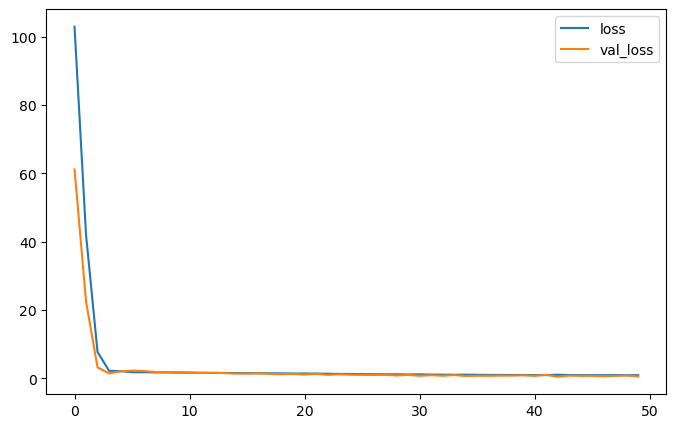

In [34]:
pd.DataFrame(historyMod2.history).plot(figsize=(8,5))

In [35]:
mse_test2=ModMLP2.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.6877 


In [36]:
100*(1-mse_test2/mse_test1)

17.725327766139863

El riesgo empírico ha disminuido un 35% aproximadamente con este nuevo modelo

In [37]:
ypred2=ModMLP2.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Real vs Predicción')

Text(0, 0.5, 'Tasa de Desempleo')

Text(0.5, 0, 'índice')

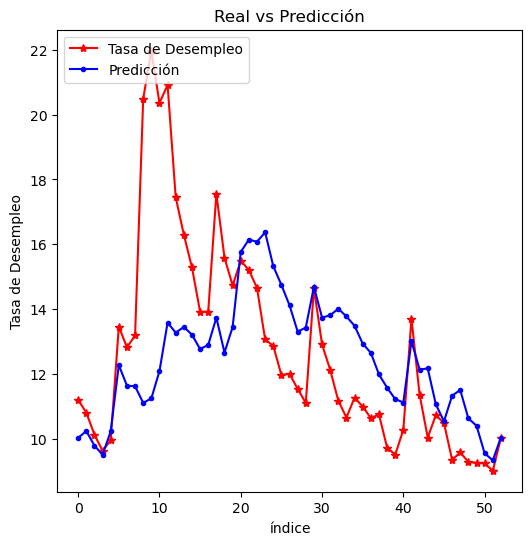

In [38]:
plt.figure(figsize=(6, 6))
plt.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='r')
plt.plot(range(ypred2.size), ypred2, linestyle='-', marker='.', color='b') 
plt.legend(['Tasa de Desempleo','Predicción'], loc=2)
plt.title('Real vs Predicción')
plt.ylabel('Tasa de Desempleo')
plt.xlabel('índice')

Las predicciones mejoran a comparación del modelo anterior, en especial en los meses más recientes, el periodo correspondiente al 2020, como es de esperar, tiene una sub-estimación.

In [39]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int("num_units", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-3, max_value=1e-2,step=0.003)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=["mean_squared_error"]
    )
    return model


build_model(kt.HyperParameters())

<Sequential name=sequential_3, built=False>

### Búsqueda de los hiperparámetros

In [40]:
tuner_GridSearch_mlp = kt.GridSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=None,
    executions_per_trial=1,
    overwrite=True,
    directory="dirsalida",
    project_name="helloworld",
)

In [41]:
tuner_GridSearch_mlp.search_space_summary()

Search space summary
Default search space size: 6
num_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': 0.003, 'sampling': 'linear'}


In [42]:
stop_early=keras.callbacks.EarlyStopping(monitor="val_loss",patience=2)

In [43]:
tuner_GridSearch_mlp.search(X_train,y_train, epochs=20, validation_data=(X_val,y_val),callbacks=[stop_early])

Trial 240 Complete [00h 00m 05s]
val_loss: 1.2085918188095093

Best val_loss So Far: 0.8245585560798645
Total elapsed time: 00h 14m 17s


In [44]:
# Get the top 2 models.
models_mlp = tuner_GridSearch_mlp.get_best_models(num_models=2)
best_model_mlp = models_mlp[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
# best_model_mlp.build(input_shape=(32, 1, 7))
# best_model_mlp.summary()

C:\Users\EQUIPO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


#### Los mejores 10 modelos

In [45]:
tuner_GridSearch_mlp.results_summary()

Results summary
Results in dirsalida\helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0105 summary
Hyperparameters:
num_units: 32
activation: tanh
num_layers: 2
units_0: 64
dropout: True
lr: 0.001
units_1: 64
Score: 0.8245585560798645

Trial 0097 summary
Hyperparameters:
num_units: 32
activation: tanh
num_layers: 2
units_0: 64
dropout: False
lr: 0.001
units_1: 64
Score: 0.9673415422439575

Trial 0081 summary
Hyperparameters:
num_units: 32
activation: tanh
num_layers: 2
units_0: 32
dropout: False
lr: 0.001
units_1: 64
Score: 1.0179924964904785

Trial 0077 summary
Hyperparameters:
num_units: 32
activation: tanh
num_layers: 1
units_0: 64
dropout: True
lr: 0.007
units_1: 64
Score: 1.0572987794876099

Trial 0209 summary
Hyperparameters:
num_units: 64
activation: tanh
num_layers: 2
units_0: 32
dropout: False
lr: 0.001
units_1: 64
Score: 1.060067892074585

Trial 0104 summary
Hyperparameters:
num_units: 32
activation: tanh
num_layers: 2
units_0: 64
dropout: 

### Modelo final
Finalmente se entrenará el mejor modelo con los datos de entrenamiento y validación.

In [46]:
callback=keras.callbacks.EarlyStopping(monitor="loss",patience=5)
best_hps_mlp = tuner_GridSearch_mlp.get_best_hyperparameters(2)
model_mlp = build_model(best_hps_mlp[0])
# Fit with the entire dataset.
model_mlp.fit(X_train_full,y_train_full, epochs=20,callbacks=[callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 161.4427 - mean_squared_error: 161.4427  
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96.2840 - mean_squared_error: 96.2840   
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54.3407 - mean_squared_error: 54.3407 
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 33.2628 - mean_squared_error: 33.2628
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 19.5725 - mean_squared_error: 19.5725
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 13.6498 - mean_squared_error: 13.6498
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 8.6058 - mean_squared_error: 8.6058
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9230 - mean_squared_error: 5.9230 
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0917 - mean_squared_error: 6.0917 
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8862 - mean_squared_error: 5.8862 
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [47]:
model_mlp.layers[0].get_weights()[0]

array([[-2.65774429e-01,  1.62244648e-01, -1.98603764e-01,
        -2.65620232e-01, -1.02223143e-01,  1.24316834e-01,
         2.33272627e-01,  2.73234874e-01,  2.43784606e-01,
         2.52442747e-01,  2.53759414e-01, -2.28716537e-01,
         2.90584303e-02, -2.34925568e-01, -3.69029850e-01,
        -3.67734462e-01,  3.46783966e-01, -3.01553518e-01,
         3.39276761e-01,  1.63677379e-01,  7.80425891e-02,
        -4.91409265e-02,  3.14729482e-01, -5.04143238e-02,
        -3.27302217e-02, -1.95648238e-01, -1.00524224e-01,
        -1.08365953e-01, -1.31466448e-01,  2.77456373e-01,
         2.82494873e-02,  2.10075751e-01],
       [-1.27808005e-01, -4.49307561e-02,  1.04483992e-01,
        -1.77512616e-02, -6.33661123e-03,  3.17584246e-01,
        -2.22221538e-01, -2.81969994e-01, -3.04674387e-01,
         1.01202257e-01,  1.13758236e-01, -1.42206490e-01,
         1.58226788e-01, -8.27351809e-02, -2.30344251e-01,
        -1.13752358e-01,  2.28810877e-01, -1.42290950e-01,
         1.94

In [48]:
print(model_mlp.layers[0].bias.numpy())

[ 0.00000000e+00  0.00000000e+00 -1.39387874e-02 -2.02173721e-02
 -1.35469092e-02 -4.12967405e-04 -7.57453144e-02 -6.95156977e-02
 -5.60123660e-03 -7.29650538e-03  0.00000000e+00 -1.77215226e-02
 -5.34680719e-03  4.74331528e-02  0.00000000e+00 -4.76604188e-03
  5.84577350e-03  6.50837421e-02  0.00000000e+00  1.43387625e-02
  1.76211391e-02 -1.97985023e-02 -8.66124683e-05 -7.72124995e-03
  4.82319063e-03  1.90924499e-02 -1.22368513e-02  0.00000000e+00
  0.00000000e+00  9.94968507e-03 -2.03585252e-02 -1.97957959e-02]


In [49]:
X_test.shape

(53, 9)

In [50]:
prediction_test=model_mlp.predict( X_test, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [51]:
y_test=y_test.reshape((y_test.shape[0], 1))

In [52]:
errors_squared=keras.metrics.mean_squared_error(y_test, prediction_test).numpy()
print("RECM:",errors_squared.mean()**0.5)

RECM: 5.166762853567963


Text(0, 0.5, 'Y y $\\hat{Y}$ en conjunto de prueba')

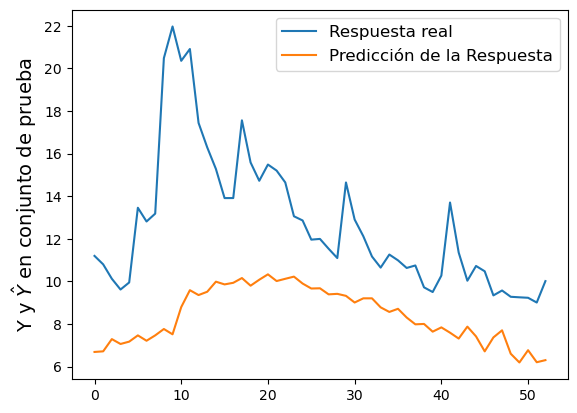

In [53]:
plt.plot(y_test)
plt.plot(prediction_test)
plt.legend(['Respuesta real','Predicción de la Respuesta'],loc="best", fontsize=12)
plt.ylabel('Y y $\hat{Y}$ en conjunto de prueba', fontsize=14)

Text(0, 0.5, '$\\hat{e}$ en conjunto de prueba')

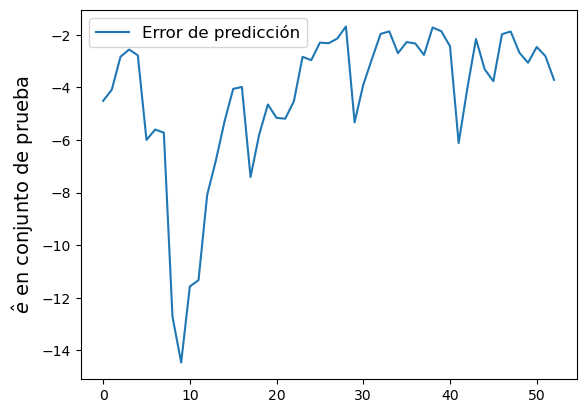

In [54]:
#Gráfico de errores
plt.plot(prediction_test-y_test)
plt.legend(['Error de predicción'],loc="best", fontsize=12)
plt.ylabel('$\hat{e}$ en conjunto de prueba', fontsize=14)